    You need to export two environment variable for this to work:
    - LIBMNEMO_SO = path to the compiled mnemo library
    - PYTHONPATH must contain the path to the mnemo python bindings in mnemo repository

In [4]:
import mnemo
import main
import numpy as np
import cProfile

In [6]:
class TracedHamiltonian(main.Hamiltonian):
    def __init__(self, *args, **kwargs):
        self.trace = mnemo.ReuseDM(0)
        self.distances = []
        super().__init__(*args, **kwargs)
        
    def reset_trace(self):
        self.trace.reset()
        self.distances = []
        
    def hash_record(self,i,j,k,l):
        p = min(i,k)
        r = max(i,k)
        t = p + (r*(r-1)//2)
        q = min(j,l)
        s = max(j,l)
        u = q + (s*(s-1)//2)
        v = min(t,u)
        w = max(t,u)
        return v + (w*(w-1)//2)
        
    def H_two_e(self, i, j, k, l):
        h = self.hash_record(i,j,k,l)
        cd = self.trace.add(h)
        self.distances.append(cd)
        return super().H_two_e(i,j,k,l)

In [16]:
fci_path = 'f2_631g.FCIDUMP'
wf_path = 'f2_631g.30det.wf'
N_ord, E0, d_one_e_integral, d_two_e_integral = main.load_integrals(f"data/{fci_path}")
psi_coef, psi_det = main.load_wf(f"data/{wf_path}")
lewis = TracedHamiltonian(d_one_e_integral, d_two_e_integral, E0)

NameError: name '_ReuseDM__libmn_reusedm_init' is not defined

In [15]:
cProfile.run("main.Powerplant(lewis, psi_det).E(psi_coef)")

         93933 function calls in 0.047 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(einsum)
     7360    0.008    0.000    0.016    0.000 <ipython-input-13-aee9fcc2069f>:11(hash_record)
     7360    0.017    0.000    0.035    0.000 <ipython-input-13-aee9fcc2069f>:22(H_two_e)
        1    0.000    0.000    0.047    0.047 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 einsumfunc.py:1004(einsum)
        6    0.000    0.000    0.000    0.000 einsumfunc.py:995(_einsum_dispatcher)
      552    0.000    0.000    0.000    0.000 main.py:242(H_one_e)
     7360    0.003    0.000    0.003    0.000 main.py:248(H_two_e)
      408    0.002    0.000    0.003    0.000 main.py:256(get_phase_idx_single_exc)
     6372    0.000    0.000    0.000    0.000 main.py:266(<lambda>)
       44    0.000    0.000    0.001    0.000 main.py:271(get_phase_i

In [16]:
len(d_two_e_integral)

38668

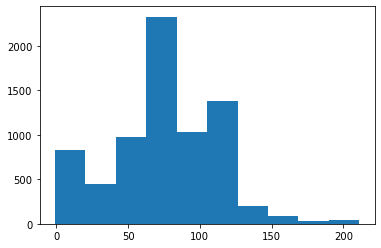

In [17]:
import matplotlib.pyplot as plt
plt.hist(lewis.distances)
plt.show()

In [18]:
fci_path='f2_631g.FCIDUMP'
wf_path='f2_631g.1det.wf'
E_ref =  -198.73029308564543
N_ord, E0, d_one_e_integral, d_two_e_integral = main.load_integrals(f"data/{fci_path}")
psi_coef, psi_det = main.load_wf(f"data/{wf_path}")
lewis = TracedHamiltonian(d_one_e_integral, d_two_e_integral, E0)

In [19]:
from main import selection_step

In [36]:
ds = []
n = 5
for i in range(4):
    lewis.reset_trace()
    cProfile.run("_, psi_coef, psi_det = selection_step(lewis, N_ord, psi_coef, psi_det, n)")
    ds.append(lewis.distances)
    n = n*2

         608186962 function calls in 259.267 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.002    0.002 <__array_function__ internals>:2(argpartition)
        1    0.000    0.000    0.050    0.050 <__array_function__ internals>:2(eigh)
        3    0.000    0.000    0.005    0.002 <__array_function__ internals>:2(einsum)
 51139181   46.837    0.000   95.044    0.000 <ipython-input-13-aee9fcc2069f>:11(hash_record)
 51139181   91.513    0.000  203.121    0.000 <ipython-input-13-aee9fcc2069f>:22(H_two_e)
        1    0.057    0.057  259.267  259.267 <string>:1(<module>)
   288765    0.038    0.000    0.079    0.000 <string>:1(__new__)
        1    0.000    0.000    0.000    0.000 _asarray.py:16(asarray)
        4    0.000    0.000    0.000    0.000 cycler.py:227(<genexpr>)
        3    0.000    0.000    0.005    0.002 einsumfunc.py:1004(einsum)
       17    0.000    0.000    0.000    0.000 ei

         868133466 function calls in 379.575 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.002    0.002 <__array_function__ internals>:2(argpartition)
        1    0.000    0.000    0.003    0.003 <__array_function__ internals>:2(eigh)
        3    0.000    0.000    0.009    0.003 <__array_function__ internals>:2(einsum)
 70568767   65.159    0.000  131.797    0.000 <ipython-input-13-aee9fcc2069f>:11(hash_record)
 70568767  125.223    0.000  279.744    0.000 <ipython-input-13-aee9fcc2069f>:22(H_two_e)
        1    0.063    0.063  379.575  379.575 <string>:1(<module>)
   428490    0.066    0.000    0.911    0.000 <string>:1(__new__)
        1    0.000    0.000    0.000    0.000 _asarray.py:16(asarray)
        3    0.000    0.000    0.009    0.003 einsumfunc.py:1004(einsum)
       17    0.000    0.000    0.000    0.000 einsumfunc.py:995(_einsum_dispatcher)
        1    0.000    0.000    0.00

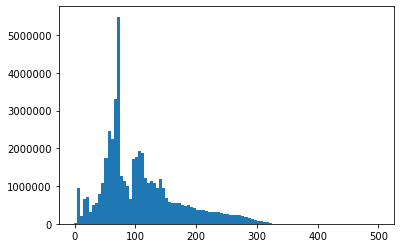

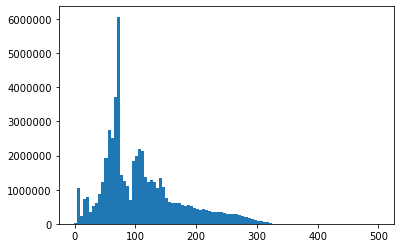

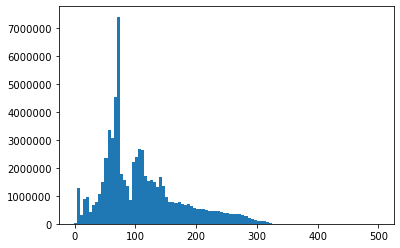

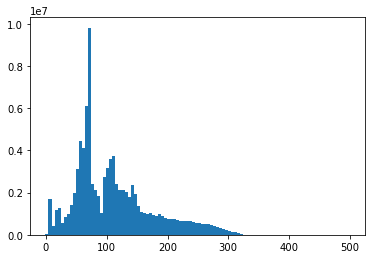

In [37]:
for h in ds:
    plt.hist(h, bins=100, range=(-1,500))
    plt.show()